In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Agglomerative (Bottom-Up) Hierarchical Clustering

Hierarchical Clustering is an alternative clustering algorithm to k-means. 
This algorithm can capture complex cluster structures. 
But it can only be used for relatively small datasets.

**Contents**

- [Hierarchical clustering step-by-step example](#1.-Hierarchical-clustering-steps-by-step-example)
- [Hierarchical clustering implementation](#2.-Hierarchical-clustering-implementation)

## 1. Hierarchical clustering step-by-step example

Let us consider the following (small) toy dataset

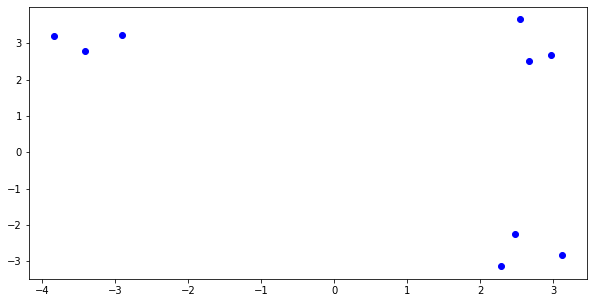

In [34]:
X = np.zeros((9,2)) #2 features; 9 data points
X[0:3] = .5*np.random.randn(3,2) + [-3,3] # blob 1; 3 points
X[3:6] = .5*np.random.randn(3,2) + [3,-3] # blob 2; 3 points
X[6:9] = .5*np.random.randn(3,2) + [3,3] # blob 3; 3 points


'plot dataset'
plt.figure(figsize=(10,5))
plt.plot(X[:,0],X[:,1],'bo')

**Hierarchical Clustering** works as follows:

**Step 1**: Make each point its own cluster of one.

In [35]:
'Make each point its own cluster of one'
k = X.shape[0] # number of clusters = number of data points
clusters = np.arange(k) #np.array([0,1,...,k-1])

In [36]:
clusters

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

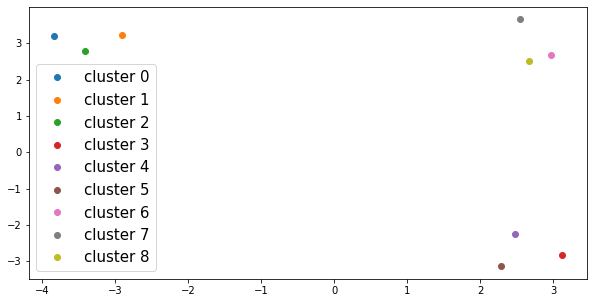

In [37]:
'plot the clusters'

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9']
plt.figure(figsize=(10,5))
for i in range(k):
    'plot ith cluster'
    plt.plot(X[clusters==i,0],X[clusters==i,1],'o',color=colors[i],label = 'cluster '+str(i))
plt.legend(fontsize=15)

In [38]:
# distance matrix
distances = np.sum(X**2,axis=1)[:,None]+np.sum(X**2,axis=1)[None,:]-2*X.dot(X.T)
np.fill_diagonal(distances, np.inf)
distances = np.sqrt(distances)
distances

array([[       inf, 0.92706364, 0.59001353, 9.18892685, 8.34084475,
        8.81223536, 6.81854695, 6.3984264 , 6.53828795],
       [0.92706364,        inf, 0.67736702, 8.53646049, 7.68977902,
        8.22512288, 5.89890179, 5.47191638, 5.62246446],
       [0.59001353, 0.67736702,        inf, 8.60018061, 7.75217874,
        8.22244523, 6.37832181, 6.02485435, 6.08785329],
       [9.18892685, 8.53646049, 8.60018061,        inf, 0.84822034,
        0.89293618, 5.4872024 , 6.49909574, 5.35119871],
       [8.34084475, 7.68977902, 7.75217874, 0.84822034,        inf,
        0.91678191, 4.94264322, 5.9087032 , 4.77024282],
       [8.81223536, 8.22512288, 8.22244523, 0.89293618, 0.91678191,
               inf, 5.85381483, 6.80851536, 5.67472105],
       [6.81854695, 5.89890179, 6.37832181, 5.4872024 , 4.94264322,
        5.85381483,        inf, 1.07323893, 0.3323611 ],
       [6.3984264 , 5.47191638, 6.02485435, 6.49909574, 5.9087032 ,
        6.80851536, 1.07323893,        inf, 1.14813064],


In [22]:
distances.shape

(9, 9)

**Step 2**: Merge the two closest clusters

We need to define **intercluster distance** (The linkage function).
We have several options:

- **Centroid linkage:** The distance between two clusters is defined as the distance between their centers (means).
- **Single linkage:** The distance between two clusters is defined as the **smallest** distance between two points in each cluster.
-  **Complete linkage:** The distance between two clusters is defined as the **largest** distance between two points in each cluster.
- **Average linkage:** The distance between two clusters is defined as the **average** distance between two points in each cluster.

We'll implement the second (single linkage), third (complete linkage) and fourth (average linkage).

In [28]:
'Single-linkage distance function'
def single_linkage(i,j, distances):
    return np.min(distances[cluster1,:][:,cluster2])

In [29]:
single_linkage(clusters[0],clusters[1],distances)

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [48]:
ci = np.where(clusters==0)[0]
cj = np.where(clusters==1)[0]

In [51]:
np.where(distances==distances[ci,:][:,cj])

(array([0, 1], dtype=int64), array([1, 0], dtype=int64))

In [47]:
distances[[0],:][:,[1]]

array([[0.92706364]])

In [45]:
distances[1:3,4:9]

array([[7.68977902, 8.22512288, 5.89890179, 5.47191638, 5.62246446],
       [7.75217874, 8.22244523, 6.37832181, 6.02485435, 6.08785329]])